***
## 딥러닝 영상처리
### 케라스와 분류

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 유방암 데이터 분류

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
X = cancer.data
y = cancer.target

X.shape, y.shape

# X (569, 30) --> 30가지 검사를 한 데이터이다.

((569, 30), (569,))

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

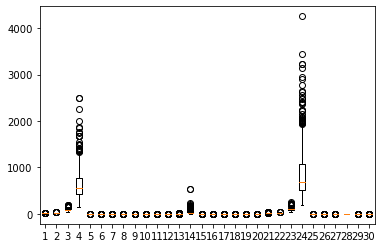

In [19]:
plt.boxplot(X);

In [48]:
# 정규화

X_norm = (X-X.mean(axis=0)) / X.std(axis=0)
X_norm.shape

(569, 30)

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30, ), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

2022-06-28 15:43:19.151596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 15:43:19.152139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [52]:
model.fit(X_norm, y, epochs=100, validation_steps=0.25)

Epoch 1/100


2022-06-28 15:44:28.640175: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 15:44:28.833362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 2s 14ms/step - loss: 0.5880 - acc: 0.7803
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4480 - acc: 0.8858
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3812 - acc: 0.9104
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3372 - acc: 0.9262
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3052 - acc: 0.9315
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2800 - acc: 0.9332
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2593 - acc: 0.9367
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2416 - acc: 0.9367
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2269 - acc: 0.9367
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2142 - acc: 0.9402
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - lo

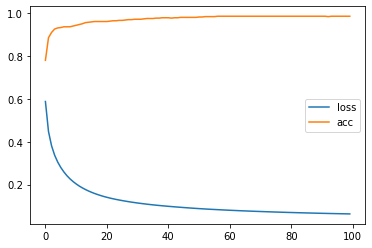

In [60]:
h = model.history.history
plt.plot(h['loss'])
plt.plot(h['acc'])
plt.legend(['loss', 'acc'])